# Midterm Practice: Predicting Boston Home Values

In this lab, we are predicting the natural log of the sum of all transactions per user.  
This is a great chance to practice all of our skills to date in order to create a regression model.
Start by importing the data and analyzing it briefly. Then, start fitting a model and performing successive iterations to tune and refine your model.

All data is stored in a csv file, 'train.csv' in the Data folder.
  
# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Data/train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


(21.936015297669055, 24.19949493266635, 0.743845241399453, 0.6922578175229193)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


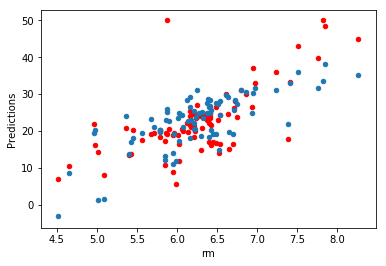

In [5]:
def FitModel(model, X_train, y_train, X_test):

    # Use training data to fit model (i.e. train the model) 
    model.fit(X_train, y_train)

    # Use training inputs to predict training outputs
    y_hat_train = model.predict(X_train)

    # Use test inputs to predict test outputs
    y_hat_test = model.predict(X_test)
    
    # Compute MSE to see how we did
    # For MSE lower is better
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    # Compute R2 to see how we did
    # For R2 lower is better
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    return y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score

linreg = LinearRegression()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(linreg, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

def ComparePredictionsWithOriginals(df, original, predictions):
    dfCompare = df.copy()
    dfCompare['Original'] = original
    dfCompare['Predictions'] = predictions
    return dfCompare

ComparePredictionsWithOriginals(X_test, y_test, y_hat_test)

ridge = Ridge()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(ridge, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

ComparePredictionsWithOriginals(X_test, y_test, y_hat_test)

lasso = Lasso()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(lasso, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

ComparePredictionsWithOriginals(X_test, y_test, y_hat_test)

ridgecv = RidgeCV()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(ridgecv, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

lassocv = LassoCV()
y_hat_train, y_hat_test, train_mse, test_mse, train_score, test_score = FitModel(lassocv, X_train, y_train, X_test)
train_mse, test_mse, train_score, test_score

compare = ComparePredictionsWithOriginals(X_test, y_test, y_hat_test)
x_feat = 'rm'
ax1 = compare[['rm','Original','Predictions']].plot(x=x_feat,y='Original', kind='scatter', color='red')
ax2 = compare[['rm','Original','Predictions']].plot(x=x_feat,y='Predictions', kind='scatter', ax=ax1)

In [6]:
model = LassoCV()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('LassoCV'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Model Stats for: LassoCV
Train R^2: 0.7052755601803506
Test R^2: 0.6304876178749481
Training MSE: 25.23896044641727
Testing MSE: 29.056832400474143
Model details: LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)


